In [16]:
from google.colab import files
import pandas as pd


uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0], index_col=0)

Saving sohila ahmed 221101149.csv to sohila ahmed 221101149 (1).csv


In [17]:

Tnu = df.shape[0]


Tni = df.shape[1]

print(f"Total Users (Tnu): {Tnu}")
print(f"Total Items (Tni): {Tni}")

Total Users (Tnu): 300
Total Items (Tni): 20


In [18]:

ratings_count_per_product = df.notna().sum()

print("Ratings Count Per Product:")
print(ratings_count_per_product)

Ratings Count Per Product:
Product_1     203
Product_2     212
Product_3     210
Product_4     223
Product_5     211
Product_6     212
Product_7     216
Product_8     197
Product_9     204
Product_10    226
Product_11    210
Product_12    229
Product_13    218
Product_14    206
Product_15    220
Product_16    205
Product_17    224
Product_18    210
Product_19    221
Product_20    207
dtype: int64


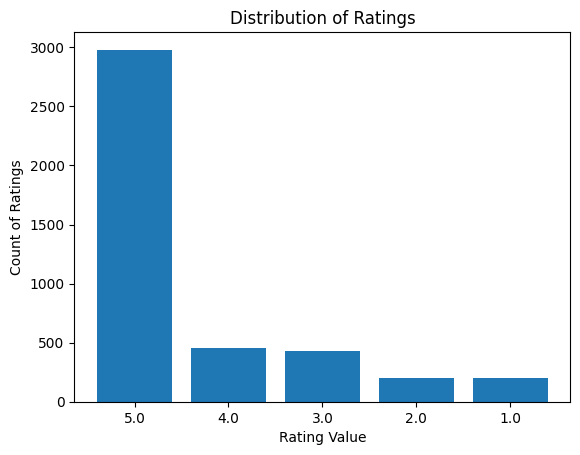

In [19]:
import matplotlib.pyplot as plt


rating_distribution = df.stack().value_counts()

plt.bar(rating_distribution.index.astype(str), rating_distribution.values)
plt.title("Distribution of Ratings")
plt.xlabel("Rating Value")
plt.ylabel("Count of Ratings")
plt.show()

In [20]:

total_entries = Tnu * Tni
non_empty_entries = df.notna().sum().sum()
sparsity_level = (1 - non_empty_entries / total_entries) * 100


bias_measure = rating_distribution[5] / rating_distribution.sum() if 5 in rating_distribution.index else 0

print(f"Sparsity Level: {sparsity_level:.2f}%")
print(f"Bias Measure (percentage of 5s): {bias_measure:.2f}")

Sparsity Level: 28.93%
Bias Measure (percentage of 5s): 0.70


In [21]:

average_ratings = df.mean()
lowest_rated_items = average_ratings.nsmallest(2).index.tolist()
I1, I2 = lowest_rated_items

print(f"Lowest Rated Items: I1 = {I1}, I2 = {I2}")

Lowest Rated Items: I1 = Product_11, I2 = Product_8


In [22]:

results = {
    "Total_users": Tnu,
    "Total_items": Tni,
    "Ratings_count_per_product": ratings_count_per_product.to_dict(),
    "Sparsity_level": sparsity_level,
    "Bias_measure": bias_measure,
    "Lowest_rated_items": {"I1": I1, "I2": I2},
}

print("Results:")
print(results)


Results:
{'Total_users': 300, 'Total_items': 20, 'Ratings_count_per_product': {'Product_1': 203, 'Product_2': 212, 'Product_3': 210, 'Product_4': 223, 'Product_5': 211, 'Product_6': 212, 'Product_7': 216, 'Product_8': 197, 'Product_9': 204, 'Product_10': 226, 'Product_11': 210, 'Product_12': 229, 'Product_13': 218, 'Product_14': 206, 'Product_15': 220, 'Product_16': 205, 'Product_17': 224, 'Product_18': 210, 'Product_19': 221, 'Product_20': 207}, 'Sparsity_level': 28.933333333333334, 'Bias_measure': 0.698874296435272, 'Lowest_rated_items': {'I1': 'Product_11', 'I2': 'Product_8'}}


In [23]:

average_I1 = df[I1].mean()
average_I2 = df[I2].mean()

print(f"Average Rating for I1 ({I1}): {average_I1}")
print(f"Average Rating for I2 ({I2}): {average_I2}")




Average Rating for I1 (Product_11): 4.20952380952381
Average Rating for I2 (Product_8): 4.213197969543147


In [24]:

df[I1].fillna(average_I1, inplace=True)
df[I2].fillna(average_I2, inplace=True)

print(f"Unspecified ratings for {I1} and {I2} have been replaced with their mean values.")


Unspecified ratings for Product_11 and Product_8 have been replaced with their mean values.


<ipython-input-24-704b993cb358>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[I1].fillna(average_I1, inplace=True)
<ipython-input-24-704b993cb358>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [25]:

average_ratings = df.mean()

print("Average Ratings for Each Item:")
print(average_ratings)


Average Ratings for Each Item:
Product_1     4.487685
Product_2     4.367925
Product_3     4.371429
Product_4     4.273543
Product_5     4.407583
Product_6     4.433962
Product_7     4.314815
Product_8     4.213198
Product_9     4.455882
Product_10    4.477876
Product_11    4.209524
Product_12    4.458515
Product_13    4.412844
Product_14    4.451456
Product_15    4.277273
Product_16    4.346341
Product_17    4.334821
Product_18    4.252381
Product_19    4.316742
Product_20    4.357488
dtype: float64


In [26]:

rating_diff = df.sub(average_ratings, axis=1)

print("Differences Between Ratings and Mean Ratings:")
print(rating_diff)


Differences Between Ratings and Mean Ratings:
                    Product_1  Product_2  Product_3  Product_4  Product_5  \
A1GI0U000004ZRJA8   -2.487685  -1.367925        NaN  -3.273543   0.592417   
A1GI0U000005ZRJA9    0.512315        NaN        NaN   0.726457        NaN   
A1GI0U000006ZRJA10        NaN        NaN        NaN   0.726457        NaN   
A1GI0U000007ZRJA11        NaN   0.632075  -1.371429  -1.273543   0.592417   
A1GI0U000008ZRJA12        NaN   0.632075   0.628571  -1.273543        NaN   
...                       ...        ...        ...        ...        ...   
A1GI0U000299ZRJA13  -0.487685        NaN   0.628571   0.726457        NaN   
A1GI0U000300ZRJA14        NaN   0.632075        NaN        NaN   0.592417   
A1GI0U000301ZRJA15        NaN        NaN  -1.371429        NaN   0.592417   
A1GI0U000302ZRJA16   0.512315   0.632075   0.628571   0.726457        NaN   
A1GI0U000303ZRJA17        NaN   0.632075  -3.371429   0.726457        NaN   

                    Product_6

In [27]:

covariance_matrix = rating_diff.cov()

print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
            Product_1  Product_2  Product_3  Product_4  Product_5  Product_6  \
Product_1    1.142174   0.190191  -0.012665   0.317809   0.014984   0.006993   
Product_2    0.190191   1.352142  -0.096865   0.069501   0.164368   0.024087   
Product_3   -0.012665  -0.096865   1.392481   0.007196   0.026918   0.229947   
Product_4    0.317809   0.069501   0.007196   1.460873  -0.071981  -0.046360   
Product_5    0.014984   0.164368   0.026918  -0.071981   1.261657  -0.094232   
Product_6    0.006993   0.024087   0.229947  -0.046360  -0.094232   1.080926   
Product_7   -0.080940  -0.190528  -0.005651   0.056150   0.045666  -0.010022   
Product_8    0.071886   0.093827  -0.025386   0.098543   0.018225  -0.029923   
Product_9    0.184441   0.122713   0.044377   0.254294   0.069744   0.026023   
Product_10   0.135608   0.010150   0.012107  -0.074422  -0.023060   0.266391   
Product_11  -0.016040  -0.068110  -0.056945  -0.067654  -0.003163   0.026857   
Product_12  -0.111227

In [28]:

covariance_matrix = rating_diff.cov()

print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
            Product_1  Product_2  Product_3  Product_4  Product_5  Product_6  \
Product_1    1.142174   0.190191  -0.012665   0.317809   0.014984   0.006993   
Product_2    0.190191   1.352142  -0.096865   0.069501   0.164368   0.024087   
Product_3   -0.012665  -0.096865   1.392481   0.007196   0.026918   0.229947   
Product_4    0.317809   0.069501   0.007196   1.460873  -0.071981  -0.046360   
Product_5    0.014984   0.164368   0.026918  -0.071981   1.261657  -0.094232   
Product_6    0.006993   0.024087   0.229947  -0.046360  -0.094232   1.080926   
Product_7   -0.080940  -0.190528  -0.005651   0.056150   0.045666  -0.010022   
Product_8    0.071886   0.093827  -0.025386   0.098543   0.018225  -0.029923   
Product_9    0.184441   0.122713   0.044377   0.254294   0.069744   0.026023   
Product_10   0.135608   0.010150   0.012107  -0.074422  -0.023060   0.266391   
Product_11  -0.016040  -0.068110  -0.056945  -0.067654  -0.003163   0.026857   
Product_12  -0.111227

In [29]:

top_5_peers_I1 = covariance_matrix[I1].nlargest(6).index.drop(I1).tolist()
top_10_peers_I1 = covariance_matrix[I1].nlargest(11).index.drop(I1).tolist()

top_5_peers_I2 = covariance_matrix[I2].nlargest(6).index.drop(I2).tolist()
top_10_peers_I2 = covariance_matrix[I2].nlargest(11).index.drop(I2).tolist()

print(f"Top 5 Peers for {I1}: {top_5_peers_I1}")
print(f"Top 10 Peers for {I1}: {top_10_peers_I1}")
print(f"Top 5 Peers for {I2}: {top_5_peers_I2}")
print(f"Top 10 Peers for {I2}: {top_10_peers_I2}")


Top 5 Peers for Product_11: ['Product_15', 'Product_14', 'Product_8', 'Product_10', 'Product_16']
Top 10 Peers for Product_11: ['Product_15', 'Product_14', 'Product_8', 'Product_10', 'Product_16', 'Product_19', 'Product_6', 'Product_7', 'Product_13', 'Product_9']
Top 5 Peers for Product_8: ['Product_19', 'Product_16', 'Product_11', 'Product_4', 'Product_2']
Top 10 Peers for Product_8: ['Product_19', 'Product_16', 'Product_11', 'Product_4', 'Product_2', 'Product_17', 'Product_1', 'Product_10', 'Product_5', 'Product_7']


In [30]:

reduced_space_top_5_I1 = df[top_5_peers_I1]
reduced_space_top_5_I2 = df[top_5_peers_I2]

print("Reduced Dimensional Space for Top 5-Peers (I1):")
print(reduced_space_top_5_I1.head())
print("Reduced Dimensional Space for Top 5-Peers (I2):")
print(reduced_space_top_5_I2.head())


Reduced Dimensional Space for Top 5-Peers (I1):
                    Product_15  Product_14  Product_8  Product_10  Product_16
A1GI0U000004ZRJA8          NaN         5.0   1.000000         5.0         NaN
A1GI0U000005ZRJA9          3.0         NaN   3.000000         5.0         5.0
A1GI0U000006ZRJA10         NaN         5.0   4.000000         2.0         5.0
A1GI0U000007ZRJA11         5.0         NaN   4.000000         5.0         3.0
A1GI0U000008ZRJA12         5.0         5.0   4.213198         NaN         5.0
Reduced Dimensional Space for Top 5-Peers (I2):
                    Product_19  Product_16  Product_11  Product_4  Product_2
A1GI0U000004ZRJA8          5.0         NaN    5.000000        1.0        3.0
A1GI0U000005ZRJA9          NaN         5.0    3.000000        5.0        NaN
A1GI0U000006ZRJA10         5.0         5.0    4.209524        5.0        NaN
A1GI0U000007ZRJA11         NaN         3.0    3.000000        3.0        5.0
A1GI0U000008ZRJA12         5.0         5.0    5.000

In [32]:

predicted_rating_I1_top_5 = reduced_space_top_5_I1.mean(axis=1)
predicted_rating_I2_top_5 = reduced_space_top_5_I2.mean(axis=1)

print("Predicted Ratings for I1 using Top 5-Peers:")
print(predicted_rating_I1_top_5)
print("Predicted Ratings for I2 using Top 5-Peers:")
print(predicted_rating_I2_top_5)


Predicted Ratings for I1 using Top 5-Peers:
A1GI0U000004ZRJA8     3.666667
A1GI0U000005ZRJA9     4.000000
A1GI0U000006ZRJA10    4.000000
A1GI0U000007ZRJA11    4.250000
A1GI0U000008ZRJA12    4.803299
                        ...   
A1GI0U000299ZRJA13    3.737733
A1GI0U000300ZRJA14    4.750000
A1GI0U000301ZRJA15    4.000000
A1GI0U000302ZRJA16    3.400000
A1GI0U000303ZRJA17    4.250000
Length: 300, dtype: float64
Predicted Ratings for I2 using Top 5-Peers:
A1GI0U000004ZRJA8     3.500000
A1GI0U000005ZRJA9     4.333333
A1GI0U000006ZRJA10    4.802381
A1GI0U000007ZRJA11    3.500000
A1GI0U000008ZRJA12    4.600000
                        ...   
A1GI0U000299ZRJA13    4.736508
A1GI0U000300ZRJA14    4.500000
A1GI0U000301ZRJA15    5.000000
A1GI0U000302ZRJA16    4.052381
A1GI0U000303ZRJA17    4.052381
Length: 300, dtype: float64


In [33]:

reduced_space_top_10_I1 = df[top_10_peers_I1]
reduced_space_top_10_I2 = df[top_10_peers_I2]

print("Reduced Dimensional Space for Top 10-Peers (I1):")
print(reduced_space_top_10_I1.head())
print("Reduced Dimensional Space for Top 10-Peers (I2):")
print(reduced_space_top_10_I2.head())


Reduced Dimensional Space for Top 10-Peers (I1):
                    Product_15  Product_14  Product_8  Product_10  Product_16  \
A1GI0U000004ZRJA8          NaN         5.0   1.000000         5.0         NaN   
A1GI0U000005ZRJA9          3.0         NaN   3.000000         5.0         5.0   
A1GI0U000006ZRJA10         NaN         5.0   4.000000         2.0         5.0   
A1GI0U000007ZRJA11         5.0         NaN   4.000000         5.0         3.0   
A1GI0U000008ZRJA12         5.0         5.0   4.213198         NaN         5.0   

                    Product_19  Product_6  Product_7  Product_13  Product_9  
A1GI0U000004ZRJA8          5.0        5.0        5.0         5.0        4.0  
A1GI0U000005ZRJA9          NaN        5.0        NaN         NaN        5.0  
A1GI0U000006ZRJA10         5.0        4.0        3.0         5.0        NaN  
A1GI0U000007ZRJA11         NaN        4.0        5.0         5.0        NaN  
A1GI0U000008ZRJA12         5.0        NaN        3.0         4.0        5.

In [34]:

predicted_rating_I1_top_10 = reduced_space_top_10_I1.mean(axis=1)
predicted_rating_I2_top_10 = reduced_space_top_10_I2.mean(axis=1)

print("Predicted Ratings for I1 using Top 10-Peers:")
print(predicted_rating_I1_top_10)
print("Predicted Ratings for I2 using Top 10-Peers:")
print(predicted_rating_I2_top_10)


Predicted Ratings for I1 using Top 10-Peers:
A1GI0U000004ZRJA8     4.375000
A1GI0U000005ZRJA9     4.333333
A1GI0U000006ZRJA10    4.125000
A1GI0U000007ZRJA11    4.428571
A1GI0U000008ZRJA12    4.526650
                        ...   
A1GI0U000299ZRJA13    4.459028
A1GI0U000300ZRJA14    4.625000
A1GI0U000301ZRJA15    4.625000
A1GI0U000302ZRJA16    3.857143
A1GI0U000303ZRJA17    4.000000
Length: 300, dtype: float64
Predicted Ratings for I2 using Top 10-Peers:
A1GI0U000004ZRJA8     3.888889
A1GI0U000005ZRJA9     4.600000
A1GI0U000006ZRJA10    4.172789
A1GI0U000007ZRJA11    4.250000
A1GI0U000008ZRJA12    4.428571
                        ...   
A1GI0U000299ZRJA13    4.701587
A1GI0U000300ZRJA14    4.625000
A1GI0U000301ZRJA15    4.500000
A1GI0U000302ZRJA16    4.401190
A1GI0U000303ZRJA17    4.201587
Length: 300, dtype: float64


In [35]:

comparison_I1 = pd.DataFrame({
    "Top 5-Peers": predicted_rating_I1_top_5,
    "Top 10-Peers": predicted_rating_I1_top_10
})

comparison_I2 = pd.DataFrame({
    "Top 5-Peers": predicted_rating_I2_top_5,
    "Top 10-Peers": predicted_rating_I2_top_10
})

print("Comparison for I1:")
print(comparison_I1)

print("Comparison for I2:")
print(comparison_I2)

print("The comparison indicates how including more peers affects the rating predictions. Analyze the results for differences.")


Comparison for I1:
                    Top 5-Peers  Top 10-Peers
A1GI0U000004ZRJA8      3.666667      4.375000
A1GI0U000005ZRJA9      4.000000      4.333333
A1GI0U000006ZRJA10     4.000000      4.125000
A1GI0U000007ZRJA11     4.250000      4.428571
A1GI0U000008ZRJA12     4.803299      4.526650
...                         ...           ...
A1GI0U000299ZRJA13     3.737733      4.459028
A1GI0U000300ZRJA14     4.750000      4.625000
A1GI0U000301ZRJA15     4.000000      4.625000
A1GI0U000302ZRJA16     3.400000      3.857143
A1GI0U000303ZRJA17     4.250000      4.000000

[300 rows x 2 columns]
Comparison for I2:
                    Top 5-Peers  Top 10-Peers
A1GI0U000004ZRJA8      3.500000      3.888889
A1GI0U000005ZRJA9      4.333333      4.600000
A1GI0U000006ZRJA10     4.802381      4.172789
A1GI0U000007ZRJA11     3.500000      4.250000
A1GI0U000008ZRJA12     4.600000      4.428571
...                         ...           ...
A1GI0U000299ZRJA13     4.736508      4.701587
A1GI0U000300ZRJA14

In [36]:

def compute_mle_covariance(df):
    n_items = df.shape[1]
    mle_covariance = pd.DataFrame(0, index=df.columns, columns=df.columns)

    for i in df.columns:
        for j in df.columns:

            common_ratings = df[[i, j]].dropna()
            if len(common_ratings) > 0:
                mle_covariance.loc[i, j] = common_ratings.corr().iloc[0, 1]
            else:
                mle_covariance.loc[i, j] = 0

    return mle_covariance

mle_covariance_matrix = compute_mle_covariance(df)

print("MLE Covariance Matrix:")
print(mle_covariance_matrix)


<ipython-input-36-94259524479c>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.14362529089358106' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mle_covariance.loc[i, j] = common_ratings.corr().iloc[0, 1]
<ipython-input-36-94259524479c>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.01054372009315537' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mle_covariance.loc[i, j] = common_ratings.corr().iloc[0, 1]
<ipython-input-36-94259524479c>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.26026910843063034' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mle_covariance.loc[i, j] = common_ratings.corr().iloc[

MLE Covariance Matrix:
            Product_1  Product_2  Product_3  Product_4  Product_5  Product_6  \
Product_1    1.000000   0.143625  -0.010544   0.260269   0.014439   0.006334   
Product_2    0.143625   1.000000  -0.067247   0.045489   0.127748   0.017740   
Product_3   -0.010544  -0.067247   1.000000   0.005062   0.022762   0.166745   
Product_4    0.260269   0.045489   0.005062   1.000000  -0.053583  -0.036713   
Product_5    0.014439   0.127748   0.022762  -0.053583   1.000000  -0.082209   
Product_6    0.006334   0.017740   0.166745  -0.036713  -0.082209   1.000000   
Product_7   -0.059209  -0.137659  -0.004235   0.040003   0.035941  -0.008494   
Product_8    0.066235   0.081582  -0.021764   0.080314   0.015890  -0.026948   
Product_9    0.147199   0.083421   0.040776   0.189714   0.055879   0.026515   
Product_10   0.123841   0.009270   0.011112  -0.060749  -0.021608   0.244580   
Product_11  -0.014347  -0.057251  -0.046061  -0.054101  -0.002577   0.026397   
Product_12  -0.10

In [37]:

top_5_peers_I1_mle = mle_covariance_matrix[I1].nlargest(6).index.drop(I1).tolist()
top_10_peers_I1_mle = mle_covariance_matrix[I1].nlargest(11).index.drop(I1).tolist()

top_5_peers_I2_mle = mle_covariance_matrix[I2].nlargest(6).index.drop(I2).tolist()
top_10_peers_I2_mle = mle_covariance_matrix[I2].nlargest(11).index.drop(I2).tolist()

print(f"Top 5 Peers for {I1} (MLE): {top_5_peers_I1_mle}")
print(f"Top 10 Peers for {I1} (MLE): {top_10_peers_I1_mle}")
print(f"Top 5 Peers for {I2} (MLE): {top_5_peers_I2_mle}")
print(f"Top 10 Peers for {I2} (MLE): {top_10_peers_I2_mle}")


Top 5 Peers for Product_11 (MLE): ['Product_15', 'Product_14', 'Product_8', 'Product_10', 'Product_16']
Top 10 Peers for Product_11 (MLE): ['Product_15', 'Product_14', 'Product_8', 'Product_10', 'Product_16', 'Product_19', 'Product_6', 'Product_7', 'Product_13', 'Product_9']
Top 5 Peers for Product_8 (MLE): ['Product_19', 'Product_16', 'Product_11', 'Product_2', 'Product_4']
Top 10 Peers for Product_8 (MLE): ['Product_19', 'Product_16', 'Product_11', 'Product_2', 'Product_4', 'Product_1', 'Product_17', 'Product_10', 'Product_5', 'Product_7']


In [38]:

reduced_space_top_5_I1_mle = df[top_5_peers_I1_mle]
reduced_space_top_5_I2_mle = df[top_5_peers_I2_mle]

print("Reduced Dimensional Space for Top 5-Peers (I1):")
print(reduced_space_top_5_I1_mle.head())

print("Reduced Dimensional Space for Top 5-Peers (I2):")
print(reduced_space_top_5_I2_mle.head())


Reduced Dimensional Space for Top 5-Peers (I1):
                    Product_15  Product_14  Product_8  Product_10  Product_16
A1GI0U000004ZRJA8          NaN         5.0   1.000000         5.0         NaN
A1GI0U000005ZRJA9          3.0         NaN   3.000000         5.0         5.0
A1GI0U000006ZRJA10         NaN         5.0   4.000000         2.0         5.0
A1GI0U000007ZRJA11         5.0         NaN   4.000000         5.0         3.0
A1GI0U000008ZRJA12         5.0         5.0   4.213198         NaN         5.0
Reduced Dimensional Space for Top 5-Peers (I2):
                    Product_19  Product_16  Product_11  Product_2  Product_4
A1GI0U000004ZRJA8          5.0         NaN    5.000000        3.0        1.0
A1GI0U000005ZRJA9          NaN         5.0    3.000000        NaN        5.0
A1GI0U000006ZRJA10         5.0         5.0    4.209524        NaN        5.0
A1GI0U000007ZRJA11         NaN         3.0    3.000000        5.0        3.0
A1GI0U000008ZRJA12         5.0         5.0    5.000

In [39]:

predicted_rating_I1_top_5_mle = reduced_space_top_5_I1_mle.mean(axis=1)
predicted_rating_I2_top_5_mle = reduced_space_top_5_I2_mle.mean(axis=1)

print("Predicted Ratings for I1 using Top 5-Peers (MLE):")
print(predicted_rating_I1_top_5_mle)

print("Predicted Ratings for I2 using Top 5-Peers (MLE):")
print(predicted_rating_I2_top_5_mle)


Predicted Ratings for I1 using Top 5-Peers (MLE):
A1GI0U000004ZRJA8     3.666667
A1GI0U000005ZRJA9     4.000000
A1GI0U000006ZRJA10    4.000000
A1GI0U000007ZRJA11    4.250000
A1GI0U000008ZRJA12    4.803299
                        ...   
A1GI0U000299ZRJA13    3.737733
A1GI0U000300ZRJA14    4.750000
A1GI0U000301ZRJA15    4.000000
A1GI0U000302ZRJA16    3.400000
A1GI0U000303ZRJA17    4.250000
Length: 300, dtype: float64
Predicted Ratings for I2 using Top 5-Peers (MLE):
A1GI0U000004ZRJA8     3.500000
A1GI0U000005ZRJA9     4.333333
A1GI0U000006ZRJA10    4.802381
A1GI0U000007ZRJA11    3.500000
A1GI0U000008ZRJA12    4.600000
                        ...   
A1GI0U000299ZRJA13    4.736508
A1GI0U000300ZRJA14    4.500000
A1GI0U000301ZRJA15    5.000000
A1GI0U000302ZRJA16    4.052381
A1GI0U000303ZRJA17    4.052381
Length: 300, dtype: float64


In [40]:

reduced_space_top_10_I1_mle = df[top_10_peers_I1_mle]
reduced_space_top_10_I2_mle = df[top_10_peers_I2_mle]

print("Reduced Dimensional Space for Top 10-Peers (I1):")
print(reduced_space_top_10_I1_mle.head())

print("Reduced Dimensional Space for Top 10-Peers (I2):")
print(reduced_space_top_10_I2_mle.head())


Reduced Dimensional Space for Top 10-Peers (I1):
                    Product_15  Product_14  Product_8  Product_10  Product_16  \
A1GI0U000004ZRJA8          NaN         5.0   1.000000         5.0         NaN   
A1GI0U000005ZRJA9          3.0         NaN   3.000000         5.0         5.0   
A1GI0U000006ZRJA10         NaN         5.0   4.000000         2.0         5.0   
A1GI0U000007ZRJA11         5.0         NaN   4.000000         5.0         3.0   
A1GI0U000008ZRJA12         5.0         5.0   4.213198         NaN         5.0   

                    Product_19  Product_6  Product_7  Product_13  Product_9  
A1GI0U000004ZRJA8          5.0        5.0        5.0         5.0        4.0  
A1GI0U000005ZRJA9          NaN        5.0        NaN         NaN        5.0  
A1GI0U000006ZRJA10         5.0        4.0        3.0         5.0        NaN  
A1GI0U000007ZRJA11         NaN        4.0        5.0         5.0        NaN  
A1GI0U000008ZRJA12         5.0        NaN        3.0         4.0        5.

In [41]:

predicted_rating_I1_top_10_mle = reduced_space_top_10_I1_mle.mean(axis=1)
predicted_rating_I2_top_10_mle = reduced_space_top_10_I2_mle.mean(axis=1)

print("Predicted Ratings for I1 using Top 10-Peers (MLE):")
print(predicted_rating_I1_top_10_mle)

print("Predicted Ratings for I2 using Top 10-Peers (MLE):")
print(predicted_rating_I2_top_10_mle)


Predicted Ratings for I1 using Top 10-Peers (MLE):
A1GI0U000004ZRJA8     4.375000
A1GI0U000005ZRJA9     4.333333
A1GI0U000006ZRJA10    4.125000
A1GI0U000007ZRJA11    4.428571
A1GI0U000008ZRJA12    4.526650
                        ...   
A1GI0U000299ZRJA13    4.459028
A1GI0U000300ZRJA14    4.625000
A1GI0U000301ZRJA15    4.625000
A1GI0U000302ZRJA16    3.857143
A1GI0U000303ZRJA17    4.000000
Length: 300, dtype: float64
Predicted Ratings for I2 using Top 10-Peers (MLE):
A1GI0U000004ZRJA8     3.888889
A1GI0U000005ZRJA9     4.600000
A1GI0U000006ZRJA10    4.172789
A1GI0U000007ZRJA11    4.250000
A1GI0U000008ZRJA12    4.428571
                        ...   
A1GI0U000299ZRJA13    4.701587
A1GI0U000300ZRJA14    4.625000
A1GI0U000301ZRJA15    4.500000
A1GI0U000302ZRJA16    4.401190
A1GI0U000303ZRJA17    4.201587
Length: 300, dtype: float64
